In [45]:
import pandas as pd
df = pd.read_csv("datasets/adult.data", sep=", ")

C:\Users\elizabeth.xu\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [46]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [47]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [48]:
#Question: Predict whether income >$50K/year?

#SMART Question: Does individual demographics (age, workclass, education, occupation, and race) correlate with income in 1996?

#Specific - Clearly define dataset and key variables. 
#Measurable - We will test to see if there is correlation between different variables to eliminate co-linearity. 
#Attainable - The question I am asking is feasiblity for dataset and is not a
#Reproducible - Yes, we are using consensus data from 1996, so we can replicate
#Time-bound - Yes this data is time-bound for 1996.

In [49]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

(array([ 8432.,  8686.,  9120.,  9157.,  5965.,  3876.,  2456.,   777.,
          277.,    96.]),
 array([ 17. ,  24.3,  31.6,  38.9,  46.2,  53.5,  60.8,  68.1,  75.4,
         82.7,  90. ]),
 <a list of 10 Patch objects>)

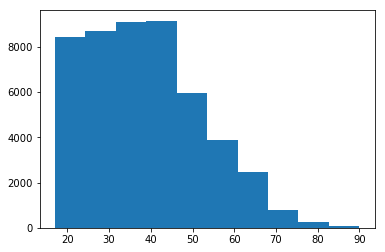

In [66]:

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(df.age)

#import seaborn as sns
#sns.pairplot(df.age)

In [67]:
#import pandas as pd
#equiv = {"<=50K":0, ">50K":1, "<=50K.":0, ">50K.":1}
#df = pd.DataFrame( {"A":[7001, 8001, 9001]})
#df["Income_New"] = df ["income"].map(equiv)
#print(df.head())

In [68]:
#df['income'].value_counts()

In [71]:
equiv = {"<=50K":0, ">50K":1, "<=50K.":0, ">50K.":1}
df["Income_New"] = df ["income"].map(equiv)

#equiv = {"Male":0, "Female":1}
#df["Sex_New"] = df ["sex"].map(equiv)


import statsmodels.formula.api as smf

lm = smf.ols(formula='Income_New ~ age', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Income_New   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2737.
Date:                Mon, 28 Aug 2017   Prob (F-statistic):               0.00
Time:                        21:51:58   Log-Likelihood:                -26368.
No. Observations:               48842   AIC:                         5.274e+04
Df Residuals:                   48840   BIC:                         5.276e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0377      0.006     -6.718      0.000      -0.049      -0.027
age            0.0072      0.000     52.318      0.000       0.007       0.007
==============================================================================
Omnibus:                     7548.826   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10123.153
Skew:                           1.085   Prob(JB):                         0.00
Kurtosis:                       2.482   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

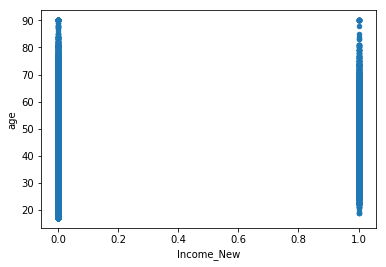

In [73]:
%matplotlib inline
df.plot.scatter("Income_New", "age")

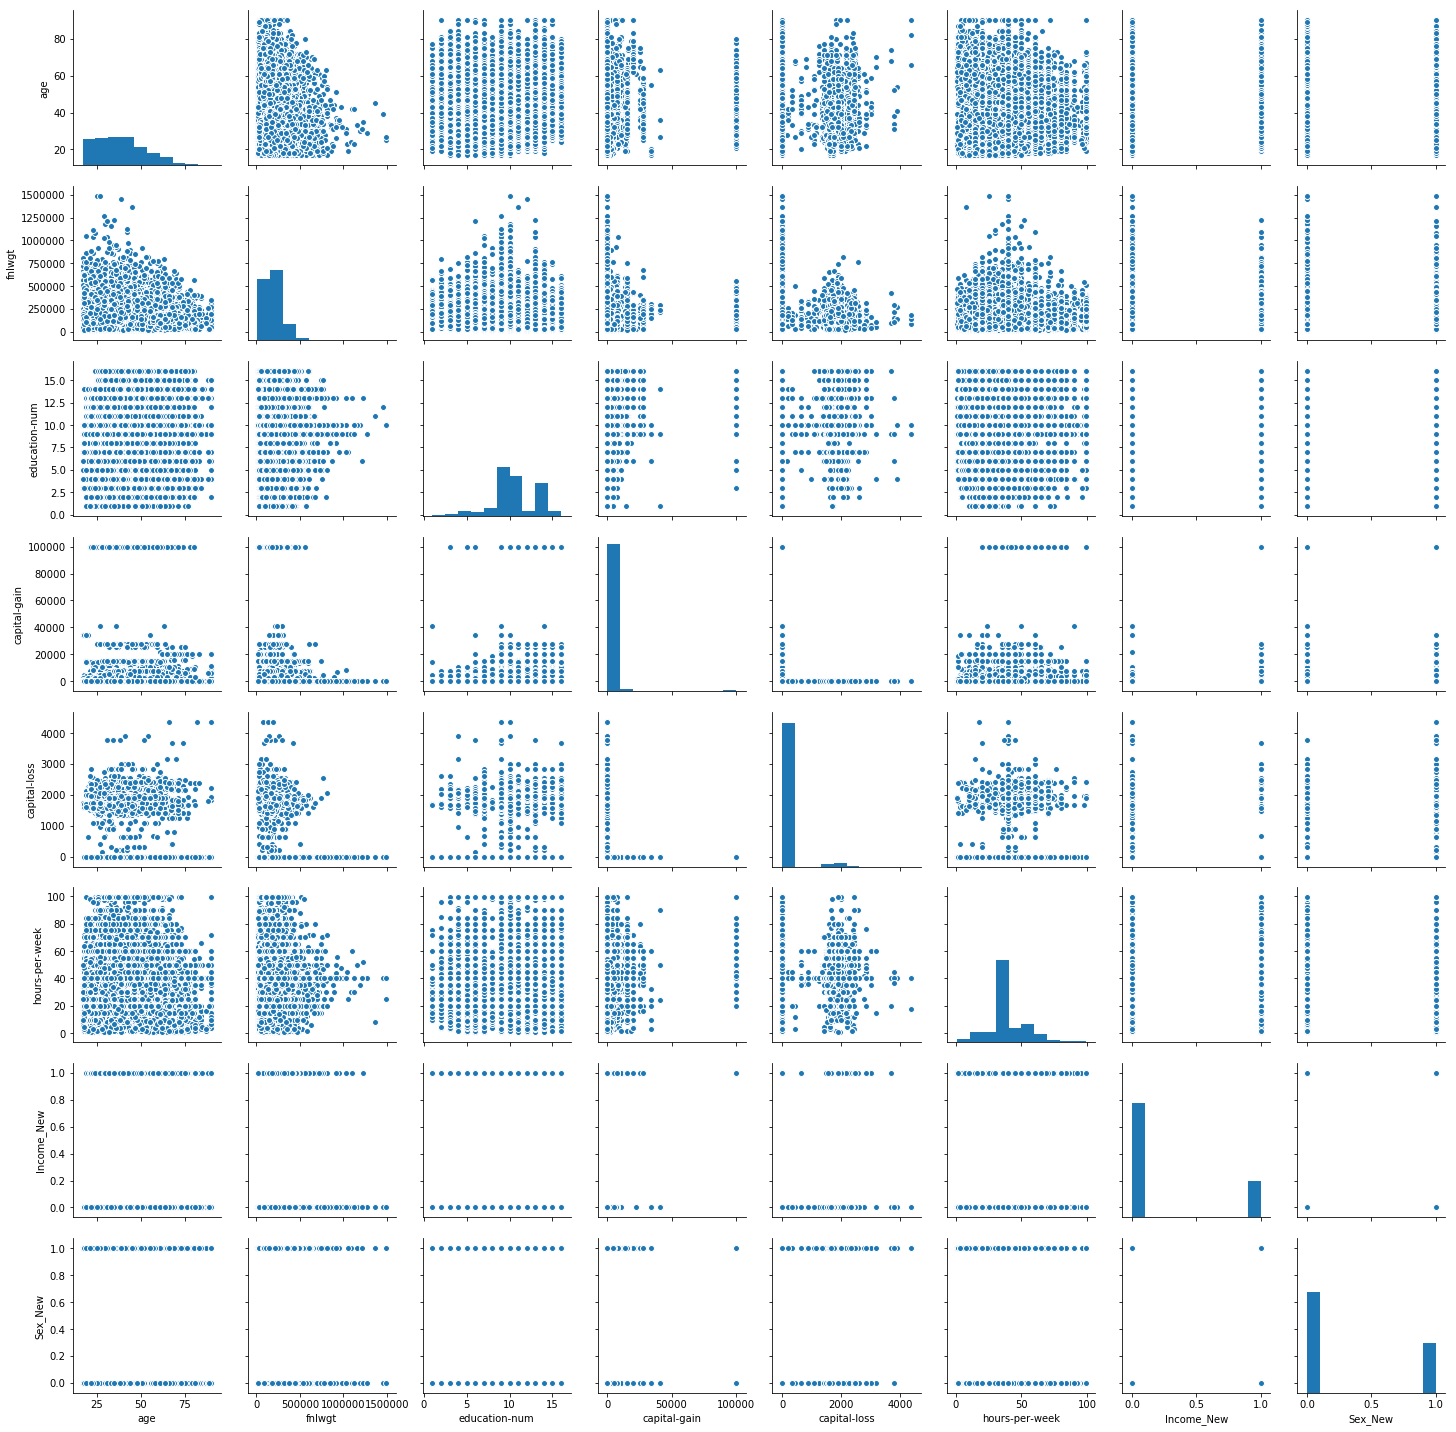

In [74]:
sns.pairplot(df)

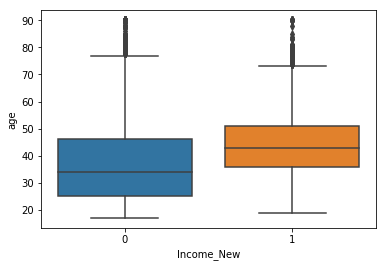

In [76]:
%matplotlib inline
sns.boxplot(x="Income_New", y="age", data=df)

In [ ]:
sns.swarmplot(x="Income_New", y="education_num", data=df)

In [ ]:
sns.boxplot(x="Income_New", y="education_num", data=df)